In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.models import Sequential

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from PIL import Image
import os
import shutil
import random
%matplotlib inline

/Users/yoshidatomoya/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
X_train_ori = np.zeros((1200,96,96,3))
X_test_ori  = np.zeros((100,96,96,3))
Y_train  = np.zeros((1200, 1))
Y_test  = np.zeros((100, 1))

train_nogi = './img/train/nogi'
train_akb = './img/train/akb/'
test_nogi = './img/test/nogi/'
test_akb = './img/test/akb/'

# nogi_train
for i, file in enumerate(os.listdir(train_nogi)):
    if file[-3:] == "jpg":            
        img = image.loaßd_img(os.path.join(train_nogi, file), target_size= (96, 96))
        arr = image.img_to_array(img)
        arr = np.expand_dims(img, axis=0)
        X_train_ori [i,] = arr
        Y_train [i,] = 0

# akb_train
for i, file in enumerate(os.listdir(train_akb)):
    if file[-3:] == "jpg":            
        img = image.load_img(os.path.join(train_akb, file), target_size= (96, 96))
        img = image.img_to_array(img)
        arr = np.expand_dims(img, axis=0)
        X_train_ori [i + 600,] = arr
        Y_train[i + 600] = 1

# nogi _test
for i, file in enumerate(os.listdir(test_nogi)):
    if file[-3:] == "jpg":            
        img = image.load_img(os.path.join(test_nogi, file), target_size= (96, 96))
        arr = image.img_to_array(img)
        #arr = np.expand_dims(img, axis=0)
        X_test_ori [i,] = arr
        Y_test[i,] = 0

# akb_test
for i, file in enumerate(os.listdir(test_akb)):
    if file[-3:] == "jpg":            
        img = image.load_img(os.path.join(test_akb, file), target_size= (96, 96))
        arr = image.img_to_array(img)
        #arr = np.expand_dims(img, axis=0)
        X_test_ori [i + 50,] = arr
        Y_test[i + 50] = 1

X_train = X_train_ori.astype('float32')
X_test = X_test_ori.astype('float32')
X_train = X_train/255.
X_test = X_test/255.

In [3]:
# model

model = Sequential()
model.add(Conv2D(16,(7,7),input_shape=(96,96,3),name ='conv0'))
model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), name='max_pool1'))

model.add(Conv2D(32,(5,5),name ='conv1'))
model.add(BatchNormalization(axis = 3, name = 'bn1'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), name='max_pool2'))

model.add(Flatten())
model.add(Dense(100, name='fc1'))
model.add(Activation('relu'))
model.add(Dense(1, name='fc2'))
model.add(Activation('sigmoid'))

In [5]:
# train
model.compile(optimizer="Adam", loss ="binary_crossentropy", metrics = ["accuracy"])

In [63]:
stack  = model.fit(x=X_train, y= Y_train, epochs=100, batch_size=128)
model.save('./model/model_20180805')

In [4]:
model.load_weights('./model/model_20180805')

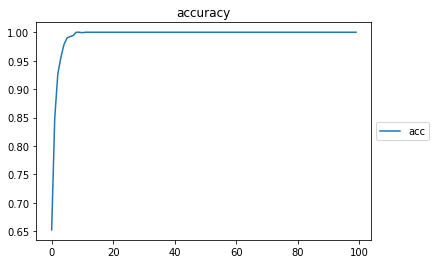

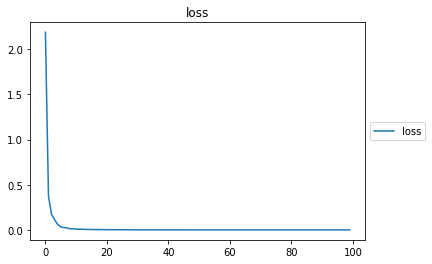

In [81]:
x = range(100)
plt.plot(x, stack.history['acc'], label="acc")
plt.title("accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, stack.history['loss'], label="loss")
plt.title("loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [10]:
preds = model.evaluate(x = X_test, y = Y_test, batch_size=100)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

100/100 [==============================] - 1s 11ms/step
Loss = 0.02803925797343254
Test Accuracy = 0.9800000190734863


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 90, 90, 16)        2368      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 90, 90, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 90, 90, 16)        0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 45, 45, 16)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 41, 41, 32)        12832     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 41, 41, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 41, 41, 32)        0         
__________

# Sample prediction

(1, 96, 96, 3)


array([[0.00370166]], dtype=float32)

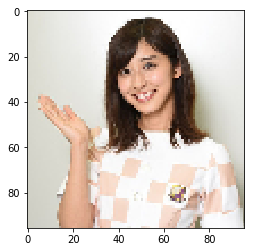

In [7]:
img_path = './img/train/nogisample02.jpeg'
img = image.load_img(img_path, target_size= (96, 96))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)/255.
print(x.shape)


model.predict(x)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [13]:
_test_result = model.predict(X_test)
test_result = np.where(_test_result < 0.5, 1, 0)
test_ans = np.where(Y_test  < 0.5, 1, 0)

In [14]:
confusion_matrix(test_ans.reshape(1,100)[0], test_result.reshape(1,100)[0],labels=[1,0])

array([[48,  2],
       [ 0, 50]])

In [15]:
accuracy_score(test_ans.reshape(1,100)[0], test_result.reshape(1,100)[0])

0.98

In [16]:
precision_score(test_ans.reshape(1,100)[0], test_result.reshape(1,100)[0],labels=[1,0])

1.0

In [17]:
recall_score(test_ans.reshape(1,100)[0], test_result.reshape(1,100)[0],labels=[1,0])

0.96

In [18]:
f1_score(test_ans.reshape(1,100)[0], test_result.reshape(1,100)[0],labels=[1,0])

0.9795918367346939

In [19]:
confusion_matrix(test_ans.reshape(1,100)[0], test_result.reshape(1,100)[0],labels=[1,0]).ravel()

array([48,  2,  0, 50])